In [15]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pycaret.classification import *
from pycaret.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pm_data = pd.read_csv("clean_data\\cleaned_data.csv")
pm_data["timestamp"] = pd.to_datetime(pm_data["timestamp"])
print(pm_data)

               timestamp   humidity     pm_2_5  temperature
0    2024-11-19 23:00:00  99.688333  23.166667    28.658334
1    2024-11-20 00:00:00  99.703334  25.500000    28.520000
2    2024-11-20 01:00:00  99.798335  24.866667    28.443333
3    2024-11-20 02:00:00  99.900002  16.883333    28.346666
4    2024-11-20 03:00:00  99.875002   9.766667    28.126666
...                  ...        ...        ...          ...
1995 2025-02-11 08:00:00  99.900002  32.583333    24.108333
1996 2025-02-11 09:00:00  99.900002  39.872727    25.109091
1997 2025-02-11 10:00:00  99.832760  22.327586    26.774138
1998 2025-02-11 11:00:00  96.426316  21.912281    28.028070
1999 2025-02-11 11:15:57  94.192308  21.571429    28.792857

[2000 rows x 4 columns]


In [3]:
s = setup(pm_data, target = 'humidity', session_id = 123,date_features=["timestamp"],normalize=True)

,Description,Value
0,Session id,123
1,Target,humidity
2,Target type,Regression
3,Original data shape,"(2000, 4)"
4,Transformed data shape,"(2000, 6)"
5,Transformed train set shape,"(1400, 6)"
6,Transformed test set shape,"(600, 6)"
7,Numeric features,2
8,Date features,1
9,Preprocess,True


In [4]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2238,0.2960,0.5311,0.9170,0.0055,0.0023,0.0780
rf,Random Forest Regressor,0.2537,0.3569,0.5839,0.8982,0.0060,0.0026,0.1320
lightgbm,Light Gradient Boosting Machine,0.3138,0.4289,0.6389,0.8770,0.0066,0.0032,0.1060
gbr,Gradient Boosting Regressor,0.3738,0.5502,0.7314,0.8434,0.0075,0.0038,0.0770
dt,Decision Tree Regressor,0.3012,0.6244,0.7781,0.8233,0.0080,0.0031,0.0220
knn,K Neighbors Regressor,0.3637,0.7548,0.8570,0.7867,0.0089,0.0038,0.0330
ada,AdaBoost Regressor,0.9257,1.4996,1.2172,0.5732,0.0124,0.0094,0.0520
lar,Least Angle Regression,1.0297,2.1552,1.4635,0.3901,0.0151,0.0106,0.0240
br,Bayesian Ridge,1.0271,2.1559,1.4637,0.3901,0.0151,0.0105,0.0230
lr,Linear Regression,1.0297,2.1552,1.4635,0.3901,0.0151,0.0106,0.9080


In [5]:
best_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3051,0.5774,0.7599,0.8593,0.0079,0.0032
1,0.1866,0.1829,0.4276,0.9601,0.0044,0.0019
2,0.1580,0.1414,0.3761,0.9438,0.0039,0.0016
3,0.2433,0.2511,0.5011,0.9397,0.0052,0.0025
4,0.1647,0.1436,0.3789,0.9441,0.0039,0.0017
5,0.2754,0.3760,0.6132,0.9000,0.0063,0.0029
6,0.2271,0.3311,0.5754,0.9173,0.0059,0.0024
7,0.2224,0.3392,0.5824,0.8725,0.0060,0.0023
8,0.2714,0.4069,0.6379,0.8910,0.0065,0.0028


In [6]:
best_model_tune = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5887,1.3207,1.1492,0.6783,0.0120,0.0061
1,0.5557,1.0946,1.0462,0.7610,0.0109,0.0058
2,0.4311,0.7514,0.8668,0.7013,0.0090,0.0045
3,0.5695,1.0581,1.0286,0.7458,0.0108,0.0059
4,0.3860,0.4837,0.6955,0.8115,0.0072,0.0040
5,0.5986,1.1634,1.0786,0.6907,0.0112,0.0062
6,0.4855,0.7030,0.8384,0.8244,0.0087,0.0050
7,0.4537,0.6399,0.7999,0.7594,0.0083,0.0047
8,0.5290,0.8858,0.9412,0.7627,0.0098,0.0055


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [7]:
ensem_best_model = ensemble_model(best_model_tune, n_estimators = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3237,0.6437,0.8023,0.8432,0.0084,0.0034
1,0.2039,0.2028,0.4503,0.9557,0.0047,0.0021
2,0.1521,0.1360,0.3688,0.9459,0.0038,0.0016
3,0.2854,0.3177,0.5637,0.9237,0.0059,0.0030
4,0.1928,0.1787,0.4228,0.9304,0.0043,0.0020
5,0.2875,0.3840,0.6197,0.8979,0.0064,0.0030
6,0.2166,0.2847,0.5335,0.9289,0.0055,0.0022
7,0.2421,0.3659,0.6049,0.8624,0.0062,0.0025
8,0.2873,0.4062,0.6374,0.8911,0.0065,0.0030


In [8]:
now = pd.Timestamp.now()
startdate = now.date()
enddate = startdate + pd.DateOffset(days=7)
next_week = pd.date_range(start=startdate, end=enddate, freq='D')

In [9]:
next_data = pd.DataFrame({'timestamp': next_week})
next_data['pm_2_5'] = pm_data['pm_2_5'].mean().round(2)
next_data['humidity'] = pm_data['humidity'].mean().round(2)
next_data['temperature'] = pm_data['temperature'].mean().round(2)


In [10]:
predict = predict_model(ensem_best_model, data=next_data)
data_plot = pd.DataFrame(predict, columns=['timestamp', 'prediction_label'])
data_plot["prediction_label"] = data_plot["prediction_label"].round(2)
data_plot

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1134,0.0129,0.1136,0.0000,0.0011,0.0011


,timestamp,prediction_label
0,2025-03-17,99.25
1,2025-03-18,99.26
2,2025-03-19,99.26
3,2025-03-20,99.26
4,2025-03-21,99.26
5,2025-03-22,99.27
6,2025-03-23,99.27
7,2025-03-24,99.28


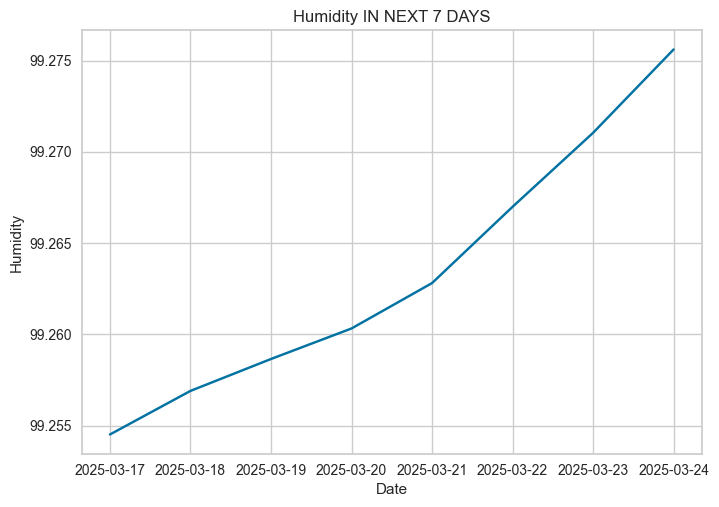

In [11]:
plt.plot(next_week, predict['prediction_label'])
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity IN NEXT 7 DAYS')
plt.grid(True)
plt.show()

In [12]:
save_model(ensem_best_model,'humidity')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['pm_2_5', 'temperature'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  BaggingRegressor(estimator=ExtraTreesRegressor(n_jobs=-1,
                                                                 random_state=123),
                                   n_estimators=50, random_state=123))]),
 'humidity.pkl')

In [13]:
# ตรวจความแม่นยำของ model
from pycaret.regression import *

model = load_model('humidity')

predictions = predict_model(model)

print(predictions)

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.2443,0.3474,0.5894,0.9233,0.0062,0.0025


               timestamp     pm_2_5  temperature   humidity  prediction_label
1342 2025-01-15 02:00:00  47.000000    25.891666  99.883339         99.741703
1338 2025-01-14 22:00:00  42.283333    26.295000  99.900002         99.714217
189  2024-11-28 00:00:00   8.866667    23.920000  99.900002         99.900002
1332 2025-01-14 16:00:00  42.016666    27.083334  97.698334         97.997272
1816 2025-02-03 20:00:00  26.916666    26.381666  99.856667         99.352587
...                  ...        ...          ...        ...               ...
457  2024-12-09 04:00:00  12.783334    26.993334  99.900002         99.900002
1126 2025-01-06 01:00:00  44.489361    26.606384  99.900002         99.697157
820  2024-12-24 07:00:00  33.750000    24.313559  99.900002         99.900002
1552 2025-01-23 20:00:00  40.466667    26.793221  99.900002         99.831446
1701 2025-01-30 01:00:00  25.833334    25.106667  99.900002         99.408934

[600 rows x 5 columns]


In [14]:
predict_humidity = pm_data
cleaned_file_path = ('D:\\7\\66-psu\\year2\\semester2\\ba ai\\termpro-predictPM25\\trainpredict_humidity.csv')
predict_humidity.to_csv(cleaned_file_path, index=False)